## Подключение библиотек

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Задание функций

Функция f1

In [6]:
def f1(x):
    return np.exp(np.cos(x))

Первая производная функции

In [9]:
def f1_1deriv(x):
    return np.sin(x) * np.exp(np.cos(x)) * (-1)

Вторая производная функции

In [12]:
def f1_2deriv(x):
    return np.exp(np.cos(x)) * (((np.sin(x))**2) - np.cos(x))

Функция задания диагоналей матрицы

In [15]:
def get_diagonals(h, N):
    # Initialize arrays for diagonals
    main_diagonal = np.zeros(N)
    upper_diagonal = np.zeros(N - 1)
    lower_diagonal = np.zeros(N - 1)

    # Calculate values for diagonals
    main_diagonal[0] = h / 3
    main_diagonal[-1] = 1
    upper_diagonal[0] = h / 6
    lower_diagonal[-1] = 0

    for i in range(1, N - 1):
        main_diagonal[i] = (h + h) / 3
        upper_diagonal[i] = h / 6
        lower_diagonal[i - 1] = h / 6

    return main_diagonal, upper_diagonal, lower_diagonal

Функция задания вектора b

In [18]:
def get_B(h, N, x):
    B = np.zeros(N)
    n = N - 1
    B[0] = (f1(x[1]) - f1(x[0])) / h - f1_1deriv(x[0])
    B[n] = f1_2deriv(x[n])

    for i in range(1, n - 1):
         B[i] = (f1(x[i + 1]) - f1(x[i])) / h - (f1(x[i]) - f1(x[i - 1])) / h

    return B

Функция вычисления матрицы методом прогонки

In [21]:
def tridiagonal(a, b, c, d):
    n = len(b)
    c_ = np.zeros(n-1)
    d_ = np.zeros(n)
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n-1):
        c_[i] = c[i] / (b[i] - a[i-1] * c_[i-1])
    for i in range(1, n):
        d_[i] = (d[i] - a[i-1] * d_[i-1]) / (b[i] - a[i-1] * c_[i-1])

    # Backward substitution
    x = np.zeros(n)
    x[-1] = d_[-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x

Функция создания сплайна

In [24]:
def make_spline(nodes, moments, h):
    def spline(x):
        for i in range(1, N):
            if nodes[i - 1] <= x <= nodes[i]:
                A = moments[i - 1] / (6*h)
                B = moments[i] / (6*h)
                C = (f1(nodes[i - 1]) - (h*h*moments[i-1])/6)/h
                D = (f1(nodes[i]) - (h*h*moments[i])/6)/h
                return A*(nodes[i] - x)**3 + B*(x - nodes[i - 1])**3 + C*(nodes[i] - x) + D*(x - nodes[i -1])
    return spline

## Задание параметров

In [73]:
a = -3
b = 3
N = 30

## Генерация равноотстоящих узлов и вычисление шага

In [76]:
nodes = np.linspace(a, b, N)
h = (b - a) / (N - 1)

## Решение системы линейных уравнений

In [79]:
main_diagonal, upper_diagonal, lower_diagonal = get_diagonals(h, N)
B = get_B(h, N, nodes)
M = tridiagonal(lower_diagonal, main_diagonal, upper_diagonal, B)

## Создаём функцию сплайна S3(x) в точке x

In [82]:
spline = make_spline(nodes, M, h)

## Вычисление значений сплайна S3(x) в дополнительных узлах

In [85]:
x_values = np.linspace(a, b, 101)

y_values_original = [f1(x) for x in x_values]

y_values_spline = [spline(x) for x in x_values]

## Создания таблицы

In [88]:
with open('values.txt', 'w') as file:
    file.write("x\t\tOriginal Function\t\tSpline\n")
    for x, y_original, y_spline in zip(x_values, y_values_original, y_values_spline):
        file.write(f'{x}\t\t{y_original}\t\t{y_spline}\n')

## Сравниваем значения сплайна с значениями функции f1(x)

In [91]:
errors = [abs(y_original - y_spline) for y_original, y_spline in zip(y_values_original, y_values_spline)]

max_error = max(errors)

print("Max Absolute Error:", max_error)

Max Absolute Error: 0.0018259310473155432


## Графики

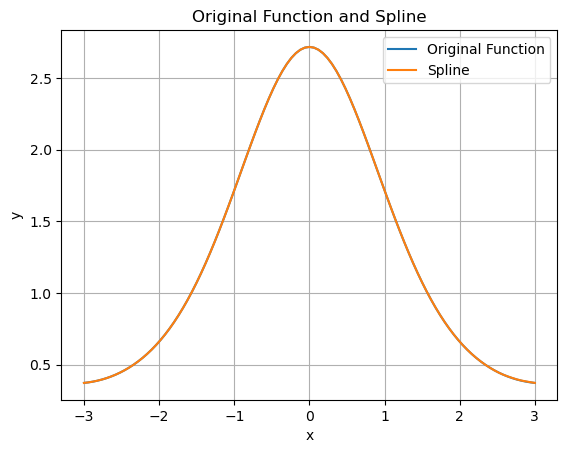

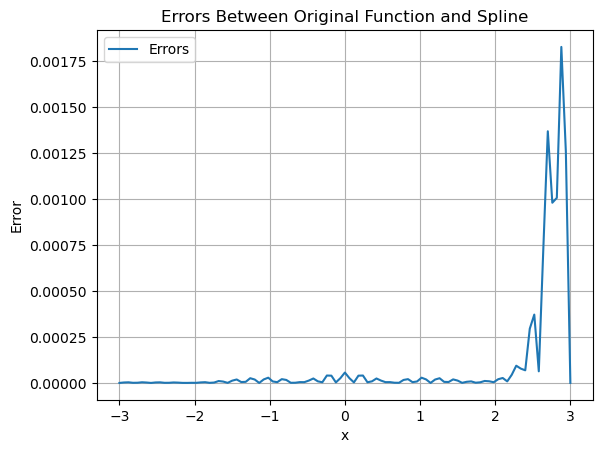

In [94]:
plt.plot(x_values, y_values_original, label='Original Function')

plt.plot(x_values, y_values_spline, label='Spline')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Function and Spline')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x_values, errors, label='Errors')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Errors Between Original Function and Spline')
plt.legend()
plt.grid(True)
plt.show()